In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('data/spx_weeklies.csv')
spx = pd.read_csv("data/spx_prices_daily.csv")

In [3]:
data['date2'] = pd.to_datetime(data['date'], format='%d/%m/%Y')
data['exdate2'] = pd.to_datetime(data['exdate'], format='%d/%m/%Y')

data['time_expiration'] = data.apply(
    lambda row: np.busday_count(row['date2'].date(), row['exdate2'].date()),
    axis=1
)

spx['date2'] = pd.to_datetime(spx['Date'], format='%d/%m/%Y')
spx_adj = spx[['date2', 'Open', 'Close', 'Adj Close', 'Volume']]

data = pd.merge(data, spx_adj, on='date2', how='left')

In [4]:
no_info = []

for column in data.columns.tolist():
    print(column)
    print(data[column].unique())
    print()

    if(len(data[column].unique())==1):
        no_info.append(column)

print(no_info)

secid
[108105]

date
['03/01/2012' '04/01/2012' '05/01/2012' ... '24/02/2023' '27/02/2023'
 '28/02/2023']

symbol
['SPXW 120106C1000000' 'SPXW 120106C1025000' 'SPXW 120106C1050000' ...
 'SPXW 230307P5000000' 'SPXW 230307P5200000' 'SPXW 230307P5400000']

symbol_flag
[1]

exdate
['06/01/2012' '13/01/2012' '21/01/2012' ... '03/03/2023' '06/03/2023'
 '07/03/2023']

last_date
[nan '29/12/2011' '30/12/2011' ... '27/02/2023' '26/02/2023' '28/02/2023']

cp_flag
['C' 'P']

strike_price
[1000000 1025000 1050000 1075000 1100000 1125000 1130000 1135000 1140000
 1145000 1150000 1155000 1160000 1165000 1170000 1175000 1180000 1185000
 1190000 1195000 1200000 1205000 1210000 1215000 1220000 1225000 1230000
 1235000 1240000 1245000 1250000 1255000 1260000 1265000 1270000 1275000
 1280000 1285000 1290000 1295000 1300000 1305000 1310000 1315000 1320000
 1325000 1330000 1335000 1340000 1345000 1350000 1375000 1400000 1425000
 1005000 1010000 1015000 1020000 1030000 1035000 1040000 1045000 1055000
 106000

In [5]:
data = data.drop(columns=no_info)
print(data.columns)

Index(['date', 'symbol', 'exdate', 'last_date', 'cp_flag', 'strike_price',
       'best_bid', 'best_offer', 'volume', 'open_interest', 'impl_volatility',
       'delta', 'gamma', 'vega', 'theta', 'optionid', 'am_settlement',
       'expiry_indicator', 'date2', 'exdate2', 'time_expiration', 'Open',
       'Close', 'Adj Close', 'Volume'],
      dtype='object')


In [6]:
nan_percentage = data['impl_volatility'].isna().mean() * 100
print(nan_percentage)

36.09815708227988


In [7]:
data_temp = data.dropna(subset=['impl_volatility']).copy()
nan_percentage = data_temp['impl_volatility'].isna().mean() * 100
print(nan_percentage)

0.0


In [8]:
data_temp['moneyness'] = data_temp['Adj Close'] / (data_temp['strike_price'] / 1000)

In [9]:
print(data_temp[['date2', 'time_expiration', 'impl_volatility', 'moneyness']])

             date2  time_expiration  impl_volatility  moneyness
0       2012-01-03                3         1.104842   1.277060
1       2012-01-03                3         1.004238   1.245912
2       2012-01-03                3         0.905286   1.216248
3       2012-01-03                3         0.807784   1.187963
4       2012-01-03                3         0.711508   1.160964
...            ...              ...              ...        ...
3205297 2023-02-28                5         0.118112   0.983928
3205298 2023-02-28                5         0.112891   0.982710
3205299 2023-02-28                5         0.106898   0.981496
3205300 2023-02-28                5         0.099015   0.980284
3205301 2023-02-28                5         0.086949   0.979075

[2048279 rows x 4 columns]


In [10]:
print(data_temp['date2'].unique())

['2012-01-03T00:00:00.000000000' '2012-01-04T00:00:00.000000000'
 '2012-01-05T00:00:00.000000000' ... '2023-02-24T00:00:00.000000000'
 '2023-02-27T00:00:00.000000000' '2023-02-28T00:00:00.000000000']


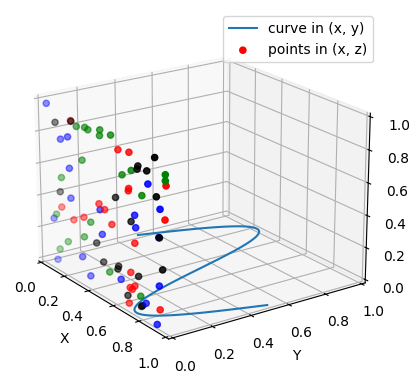

In [11]:


ax = plt.figure().add_subplot(projection='3d')

# Plot a sin curve using the x and y axes.
x = np.linspace(0, 1, 100)
y = np.sin(x * 2 * np.pi) / 2 + 0.5
ax.plot(x, y, zs=0, zdir='z', label='curve in (x, y)')

# Plot scatterplot data (20 2D points per colour) on the x and z axes.
colors = ('r', 'g', 'b', 'k')

# Fixing random state for reproducibility
np.random.seed(19680801)

x = np.random.sample(20 * len(colors))
y = np.random.sample(20 * len(colors))
c_list = []
for c in colors:
    c_list.extend([c] * 20)
# By using zdir='y', the y value of these points is fixed to the zs value 0
# and the (x, y) points are plotted on the x and z axes.
ax.scatter(x, y, zs=0, zdir='y', c=c_list, label='points in (x, z)')

# Make legend, set axes limits and labels
ax.legend()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Customize the view angle so it's easier to see that the scatter points lie
# on the plane y=0
ax.view_init(elev=20., azim=-35, roll=0)
plt.show()

In [28]:
def plot_surface(plt_data, date):
        
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    df = plt_data[plt_data['date2']==date]

    X = df['time_expiration']
    Y = df['moneyness']
    Z = df['impl_volatility']


    surf = ax.plot_trisurf(X, Y, Z, cmap='jet')


    ax.set_xlabel('Time to Maturity')
    ax.set_ylabel('Moneyness')
    ax.set_zlabel('Implied Volatility')

    ax.view_init(elev=20., azim=-35, roll=0)


    # Show plot
    plt.show()

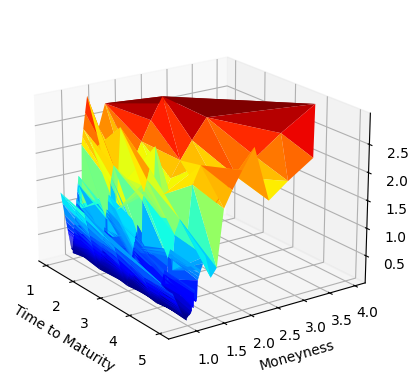

In [29]:
plot_surface(data_temp, '2023-02-28')

In [30]:
spec_data = data_temp[data_temp['date2']=='2023-02-28']

In [31]:
print(spec_data)

               date               symbol      exdate   last_date cp_flag  \
3203806  28/02/2023  SPXW 230301C3000000  01/03/2023         NaN       C   
3203807  28/02/2023  SPXW 230301C3100000  01/03/2023         NaN       C   
3203808  28/02/2023  SPXW 230301C3200000  01/03/2023  13/02/2023       C   
3203809  28/02/2023  SPXW 230301C3250000  01/03/2023         NaN       C   
3203810  28/02/2023  SPXW 230301C3300000  01/03/2023         NaN       C   
...             ...                  ...         ...         ...     ...   
3205297  28/02/2023  SPXW 230307P4035000  07/03/2023  27/02/2023       P   
3205298  28/02/2023  SPXW 230307P4040000  07/03/2023  28/02/2023       P   
3205299  28/02/2023  SPXW 230307P4045000  07/03/2023  28/02/2023       P   
3205300  28/02/2023  SPXW 230307P4050000  07/03/2023  28/02/2023       P   
3205301  28/02/2023  SPXW 230307P4055000  07/03/2023  28/02/2023       P   

         strike_price  best_bid  best_offer  volume  open_interest  ...  \
3203806     

In [34]:
spec_data = spec_data[spec_data['volume']!=0]

In [35]:
print(spec_data)

               date               symbol      exdate   last_date cp_flag  \
3203812  28/02/2023  SPXW 230301C3400000  01/03/2023  28/02/2023       C   
3203816  28/02/2023  SPXW 230301C3600000  01/03/2023  28/02/2023       C   
3203818  28/02/2023  SPXW 230301C3650000  01/03/2023  28/02/2023       C   
3203819  28/02/2023  SPXW 230301C3675000  01/03/2023  28/02/2023       C   
3203820  28/02/2023  SPXW 230301C3700000  01/03/2023  28/02/2023       C   
...             ...                  ...         ...         ...     ...   
3205296  28/02/2023  SPXW 230307P4030000  07/03/2023  28/02/2023       P   
3205298  28/02/2023  SPXW 230307P4040000  07/03/2023  28/02/2023       P   
3205299  28/02/2023  SPXW 230307P4045000  07/03/2023  28/02/2023       P   
3205300  28/02/2023  SPXW 230307P4050000  07/03/2023  28/02/2023       P   
3205301  28/02/2023  SPXW 230307P4055000  07/03/2023  28/02/2023       P   

         strike_price  best_bid  best_offer  volume  open_interest  ...  \
3203812     

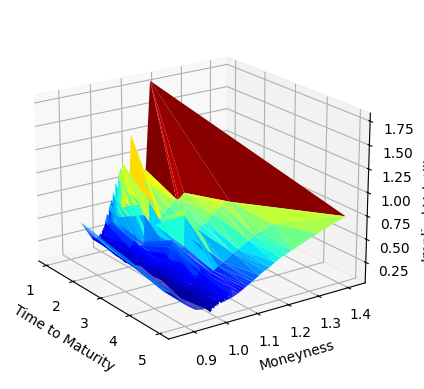

In [36]:
plot_surface(spec_data, '2023-02-28')